# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas, numpy
import matplotlib
%matplotlib inline

In [2]:
student_data = pandas.DataFrame({'X-age':[17,51,27,21,36,48,19,26,54,30], 'Y-tardies':[10,1,5,9,4,2,9,6,0,3]})
student_data

,X-age,Y-tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

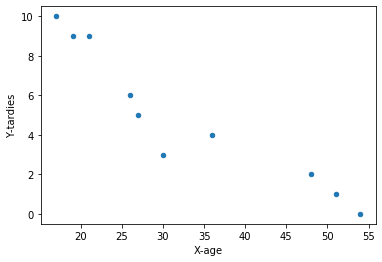

In [3]:
# Your code here.
student_data.plot.scatter('X-age','Y-tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 

#A simple vista parece existir una tendencia de los jovenes por ser mas vagos y retrasarse.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
student_data.corr()
#No existe una correlación

,X-age,Y-tardies
X-age,1.000000,-0.939163
Y-tardies,-0.939163,1.000000


In [6]:
student_data.cov()

,X-age,Y-tardies
X-age,187.655556,-45.566667
Y-tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [40]:
# Your response here.
from statsmodels.formula.api import ols
import statsmodels.api as sm
x = sm.add_constant(student_data['X-age'])
y = student_data['Y-tardies']

modelo = sm.OLS(y,x).fit()
prediccion = modelo.predict(x)
sumario = modelo.summary()
sumario

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Y-tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           5.57e-05
Time:                        15:30:10   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
X-age         -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Your code here.
modelo1 = ols('student_data["X-age"] ~ C(student_data["Y-tardies"])', data = student_data).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     student_data["X-age"]   R-squared:                       0.999
Model:                               OLS   Adj. R-squared:                  0.989
Method:                    Least Squares   F-statistic:                     105.4
Date:                   Tue, 14 Jan 2020   Prob (F-statistic):             0.0752
Time:                           15:13:53   Log-Likelihood:                -6.1422
No. Observations:                     10   AIC:                             30.28
Df Residuals:                          1   BIC:                             33.01
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             54.0000      1.414     38.184      0.017      36.031      71.969
C(student_data["Y-tardies"])[T.1]     -3.0000      2.000     -1.500      0.374     -28.412      22.412
C(student_data["Y-tardies"])[T.2]     -6.0000      2.000     -3.000      0.205     -31.412      19.412
C(student_data["Y-tardies"])[T.3]    -24.0000      2.000    -12.000      0.053     -49.412       1.412
C(student_data["Y-tardies"])[T.4]    -18.0000      2.000     -9.000      0.070     -43.412       7.412
C(student_data["Y-tardies"])[T.5]    -27.0000      2.000    -13.500      0.047     -52.412      -1.588
C(student_data["Y-tardies"])[T.6]    -28.0000      2.000    -14.000      0.045     -53.412      -2.588
C(student_data["Y-tardies"])[T.9]    -34.0000      1.732    -19.630      0.032     -56.008     -11.992
C(student_data["Y-tardies"])[T.10]   -37.0000      2.000    -18.500      0.034     -62.412     -11.588
==============================================================================
Omnibus:                        5.629   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                1.667
Skew:                           0.000   Prob(JB):                        0.435
Kurtosis:                       5.000   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

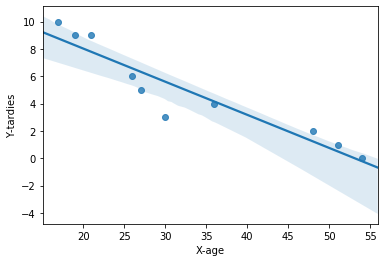

In [9]:
import seaborn as sns 
sns.regplot(student_data["X-age"], student_data["Y-tardies"], modelo);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Your response here. 
# Podemos concluir que si existe una relación importante entre la edad y los retardos de los alumnos, en este ejemplo.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
data = pandas.read_csv('./vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
# Your response here. 
data_cars = data[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
data_cars.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [13]:
data_cars.corrwith(data_cars['CO2 Emission Grams/Mile']).sort_values(ascending=False)

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
modelo_reg = ols('data_cars["CO2 Emission Grams/Mile"] ~ C(data_cars["Year"])+ C(data_cars["Cylinders"])+ C(data_cars["Fuel Barrels/Year"])+ C(data_cars["Combined MPG"])+ C(data_cars["Fuel Cost/Year"])', data = data[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]).fit()
modelo_reg

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [15]:
# Your response here. 
#Interpretamos que existe relación fuerte entre las variables elegidas y el ingremento de CO2, las 2 variables que parecen
#afectar mas son:
#Fuel Barrels/Year          0.986189
#Fuel Cost/Year             0.930865
#Cylinders                  0.752393

#Se dice Los barriles por año, y los cilindros han afectado al incremento de CO2.
modelo_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     data_cars["CO2 Emission Grams/Mile"]   R-squared:                       0.999
Model:                                              OLS   Adj. R-squared:                  0.999
Method:                                   Least Squares   F-statistic:                 2.745e+05
Date:                                  Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                                          15:13:56   Log-Likelihood:                -91043.
No. Observations:                                 35952   AIC:                         1.825e+05
Df Residuals:                                     35752   BIC:                         1.842e+05
Df Model:                                           199                                         
Covariance Type:                              nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                -1.573e+11   3.51e+11     -0.448      0.654   -8.45e+11     5.3e+11
C(data_cars["Year"])[T.1985]                                -0.0676      0.145     -0.467      0.640      -0.351       0.216
C(data_cars["Year"])[T.1986]                                -0.0618      0.151     -0.408      0.683      -0.359       0.235
C(data_cars["Year"])[T.1987]                                -0.0428      0.151     -0.283      0.777      -0.339       0.254
C(data_cars["Year"])[T.1988]                                -0.0418      0.153     -0.273      0.785      -0.342       0.259
C(data_cars["Year"])[T.1989]                                -0.0214      0.153     -0.140      0.889      -0.321       0.278
C(data_cars["Year"])[T.1990]                                -0.0211      0.155     -0.137      0.891      -0.324       0.282
C(data_cars["Year"])[T.1991]                                -0.0178      0.153     -0.116      0.907      -0.318       0.282
C(data_cars["Year"])[T.1992]                                -0.0340      0.154     -0.221      0.825      -0.335       0.267
C(data_cars["Year"])[T.1993]                                -0.0322      0.155     -0.208      0.836      -0.336       0.271
C(data_cars["Year"])[T.1994]                                -0.0427      0.158     -0.269      0.788      -0.353       0.268
C(data_cars["Year"])[T.1995]                                -0.0465      0.160     -0.292      0.771      -0.359       0.266
C(data_cars["Year"])[T.1996]                                -0.0549      0.166     -0.330      0.741      -0.381       0.271
C(data_cars["Year"])[T.1997]                                -0.0818      0.167     -0.490      0.624      -0.409       0.246
C(data_cars["Year"])[T.1998]                                -0.0775      0.166     -0.468      0.640      -0.402       0.247
C(data_cars["Year"])[T.1999]                                -0.0781      0.164     -0.477      0.634      -0.399       0.243
C(data_cars["Year"])[T.2000]                                -0.0706      0.164     -0.430      0.667      -0.392       0.251
C(data_cars["Year"])[T.2001]                                -0.0619      0.161     -0.384      0.701      -0.378       0.254
C(data_cars["Year"])[T.2002]                                -0.0535      0.159     -0.336      0.737      -0.365       0.258
C(data_cars["Year"])[T.2003]                                -0.0682      0.157     -0.434      0.664      -0.376       0.240
C(data_car

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [16]:
# Your code here. 
error = pandas.DataFrame({'X-invited':[1,3,4,6,8,9,11,14], 'Y-attended':[1,2,4,4,5,7,8,13]})
error

,X-invited,Y-attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

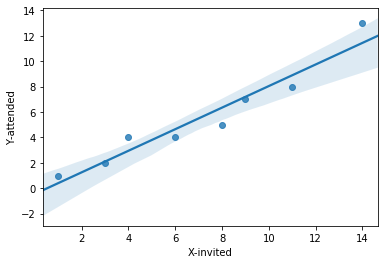

In [41]:
# Your code here.
sns.regplot(error["X-invited"], error["Y-attended"]);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
#La relación que marca el scatter plot es que mi compa puede atender a todos sus invitados, es un crack,
#sabra el diablo como le hace. Aunque pues si es una fiesta y el es anfitrión, yo pienso que la gente que no atiende son amigos de sus amigos
#O las parejas de tus amigos...es mas...voy a armar una fiesta y comprobar la hipotesis.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 
#outliers? No al menos con estos datos.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# Nothing changed.